<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import load_digits

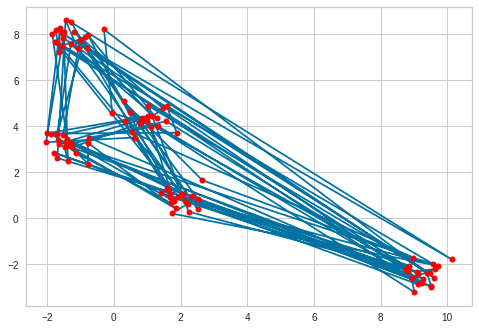

In [ ]:
X, y = make_blobs(n_samples=100, centers=5, n_features=2,cluster_std=0.4, random_state=0)
df = pd.DataFrame(X, columns = ['X','Y'])
plt.plot(df['X'],df['Y'], marker="o", markersize=6, markeredgecolor="black", markerfacecolor="red")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=56)
kmeans.fit(X_train)

y_predict = kmeans.predict(X_test)
print(kmeans.cluster_centers_)
y_test , y_predict

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 9.35198926 -2.38411524]
 [-0.33482796  3.66533924]
 [ 1.97092282  0.79693809]
 [-1.22762282  7.98970825]]


(array([2, 4, 2, 4, 4, 4, 2, 4, 0, 3, 3, 4, 3, 3, 1, 0, 0, 4, 2, 2, 3, 4,
        3, 0, 0, 0, 4, 0, 1, 3, 0, 3, 1]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 1, 3, 3, 0, 3, 3, 2, 1, 1, 0, 1, 1, 3, 0,
        3, 1, 1, 1, 0, 1, 2, 3, 1, 3, 2], dtype=int32))

<ipython-input-6-52bd675087e8>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_plot = df['X'].append(df_plot['X'])
<ipython-input-6-52bd675087e8>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Y_plot = df['Y'].append(df_plot['Y'])


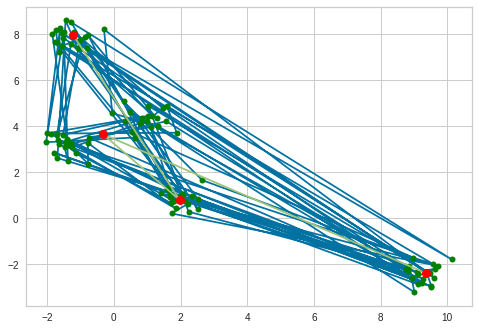

In [ ]:
df_plot = pd.DataFrame(kmeans.cluster_centers_, columns = ['X','Y'])
X_plot = df['X'].append(df_plot['X'])
Y_plot = df['Y'].append(df_plot['Y'])

plt.plot(df['X'],df['Y'], marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green")
plt.plot(df_plot['X'],df_plot['Y'], marker="o", markersize=9, markeredgecolor="lightgreen", markerfacecolor="red")


In [ ]:
silhouette_avg = silhouette_score(X_test, y_predict)
silhouette_avg

0.7257079711177437

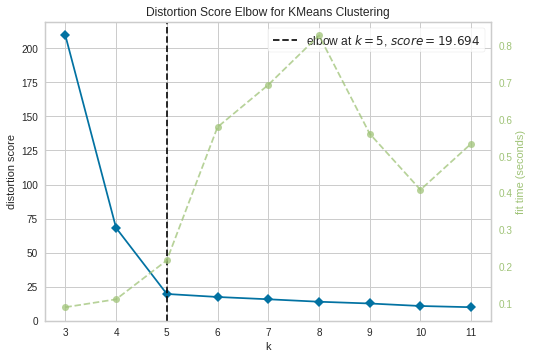

5

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(3,12))

visualizer.fit(X_train)       
visualizer.show()  
visualizer.elbow_value_ 

Handwritten Character Recognition

In [ ]:
data = load_digits()
data.keys()
data['data']
# df = pd.DataFrame(data, columns = ['data','target','frame','feature_names','target_names','images','DESCR'])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
kmeans_digit = KMeans(n_clusters=10, random_state=54)
kmeans_digit.fit(data['data'])
y_predict = kmeans_digit.predict(data['data'])
# data['target'][9],y_predict[9]
y_test = data['target']
print(precision_score(y_test, y_predict,average='micro'), accuracy_score(y_test,  y_predict), recall_score(y_test,  y_predict,average='micro'), f1_score(y_test,  y_predict,average='micro'))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2854757929883139 0.2854757929883139 0.2854757929883139 0.2854757929883139


In [ ]:
visualizer_digit = KElbowVisualizer(kmeans, k=(3,12))

visualizer.fit(data['data'])       
visualizer.show()  
visualizer.elbow_value_ 

6

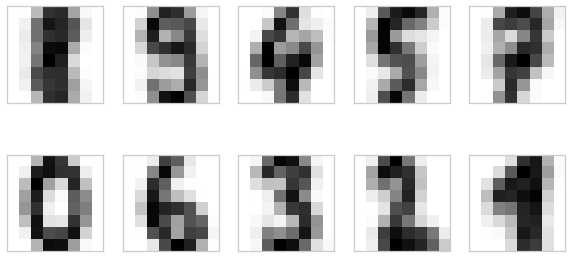

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (10,5))
centers = kmeans_digit.cluster_centers_.reshape(10,28,28)
for axi, center in zip(ax.flat, centers): 
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)